In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.shape

(545, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


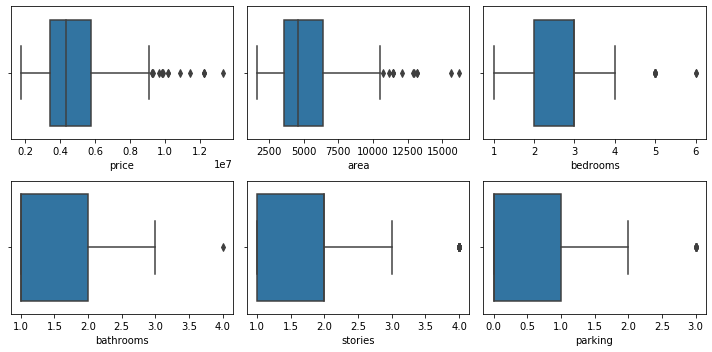

In [15]:
import warnings
warnings.filterwarnings('ignore')


fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

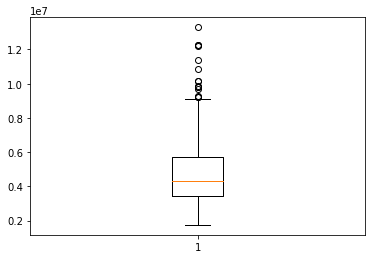

In [16]:
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

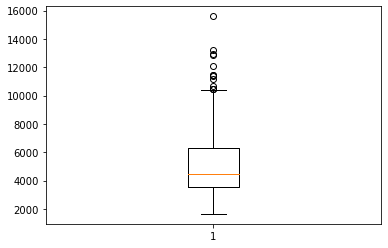

In [17]:
plt.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

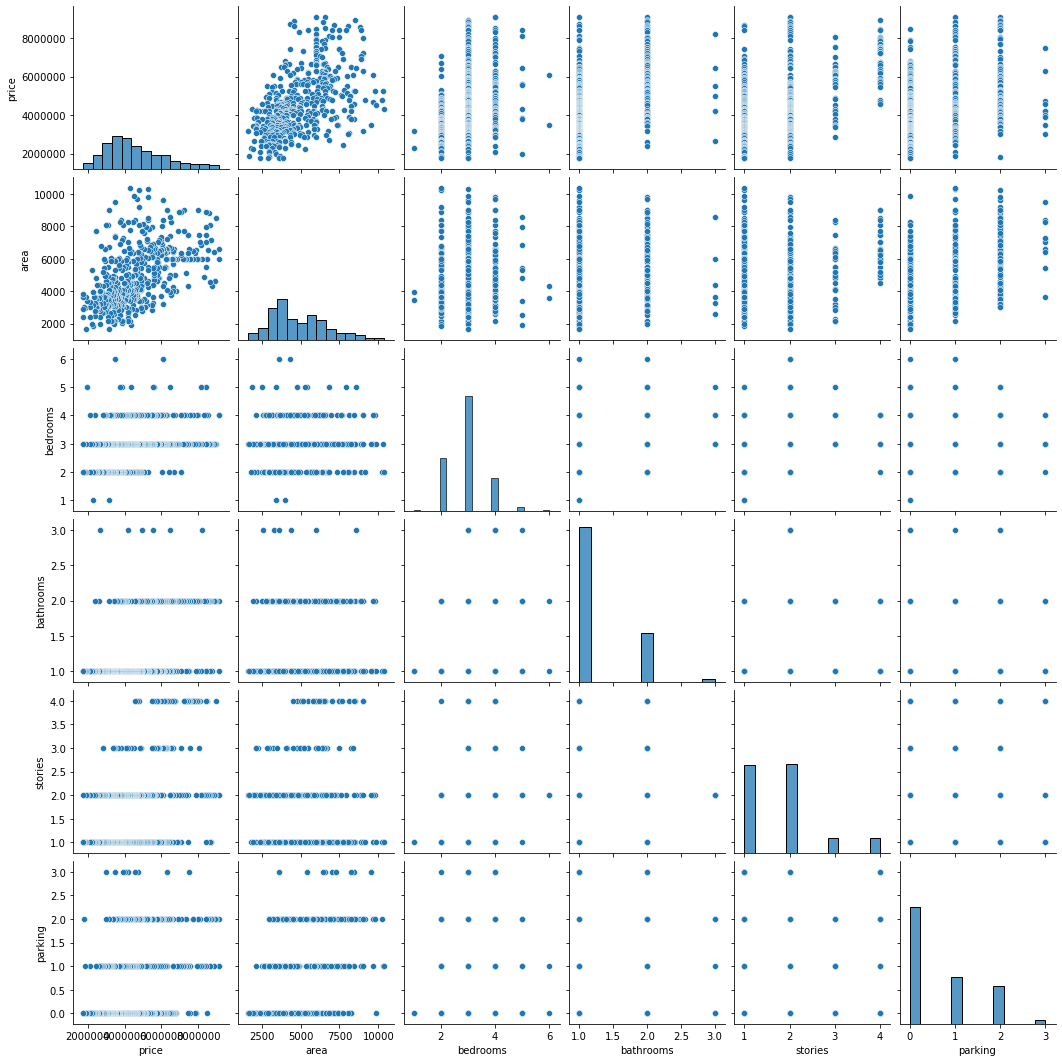

In [18]:
sns.pairplot(data)
plt.show()

In [19]:
lists =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

data[lists] = data[lists].apply(binary_map)

In [20]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [21]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,unfurnished


In [26]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)

In [27]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
15,9100000,6000,4,1,2,1,0,1,0,0,2,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1


In [28]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
540,1820000,3000,2,1,1,1,0,1,0,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.6, test_size = 0.4, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [35]:
numbers = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[numbers] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
254,0.371429,0.308102,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0
351,0.276190,0.200473,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0
295,0.333333,0.049675,0.4,0.0,0.333333,0,0,0,0,0,0.000000,0
485,0.152381,0.204021,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0
271,0.352381,0.000000,0.8,0.0,0.333333,0,0,1,0,0,0.000000,0


In [40]:
df_train.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
255,0.371429,0.470727,0.2,0.0,0.000000,1,0,0,0,1,0.333333,0
307,0.328571,0.257244,0.4,0.0,0.333333,1,0,0,0,0,0.666667,0
72,0.676190,0.368421,0.4,0.0,1.000000,1,0,0,0,1,0.000000,1
377,0.257143,0.111768,0.4,0.5,0.333333,0,0,1,0,0,0.000000,1
99,0.614286,0.484329,0.6,0.0,0.666667,1,1,1,0,0,0.000000,1


In [41]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.384825,0.352562,0.392258,0.132258,0.273118,0.874194,0.164516,0.348387,0.038710,0.306452,0.213978,0.209677
std,0.211511,0.209545,0.150742,0.224527,0.291238,0.332167,0.371343,0.477230,0.193214,0.461765,0.278212,0.407737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.293318,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.496156,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df_train.shape

(310, 12)

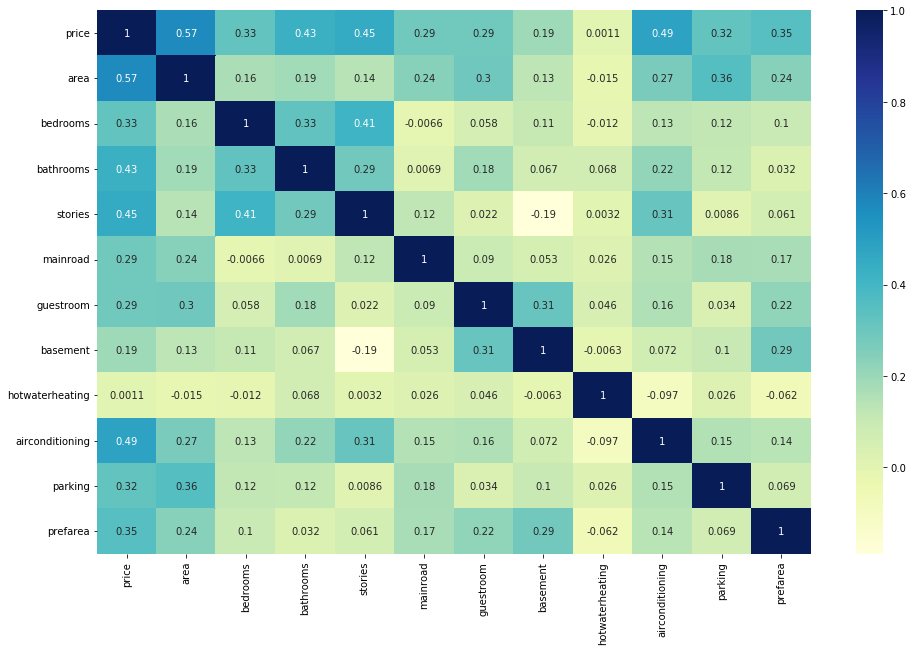

In [43]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [44]:
y_train = df_train.pop('price')
X_train = df_train

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
rfe = RFE(lm, 6)   
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 4),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 2),
 ('guestroom', False, 5),
 ('basement', False, 3),
 ('hotwaterheating', False, 6),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating'], dtype='object')

In [51]:
X_train_rfe = X_train[col]

In [54]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [55]:
!pip install statsmodels


import statsmodels.api as sm


In [56]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [58]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     85.85
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.08e-62
Time:                        12:53:25   Log-Likelihood:                 196.16
No. Observations:                 310   AIC:                            -378.3
Df Residuals:                     303   BIC:                            -352.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1102      0.015     

In [59]:
y_train_price = lm.predict(X_train_rfe)

In [60]:
res = (y_train_price - y_train)

Text(0.5, 0, 'Errors')

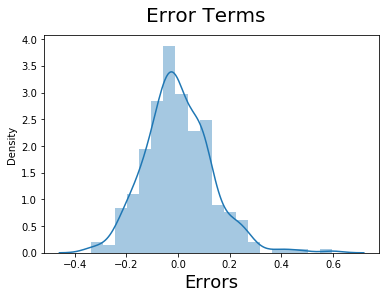

In [61]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)     
plt.xlabel('Errors', fontsize = 18)       

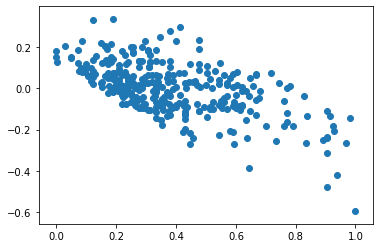

In [62]:
plt.scatter(y_train,res)
plt.show()

In [63]:
df_test[numbers] = scaler.fit_transform(df_test[numbers])

In [64]:
y_test = df_test.pop('price')
X_test = df_test

In [65]:
X_test = sm.add_constant(X_test)

In [66]:
X_test_rfe = X_test[X_train_rfe.columns]

In [67]:
y_pred = lm.predict(X_test_rfe)


In [68]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5691585846456668

Text(0, 0.5, 'y_pred')

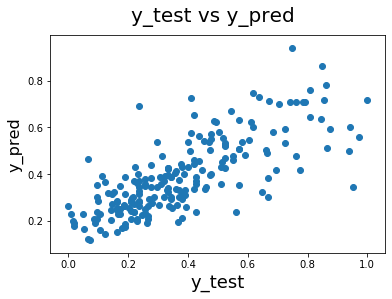

In [69]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16) 